# HW 2: Wrangling

**Q1.** This question provides some practice cleaning variables which have common problems.
1. Numeric variable: For `./data/airbnb_hw.csv`, clean the `Price` variable as well as you can, and explain the choices you make. How many missing values do you end up with? (Hint: What happens to the formatting when a price goes over 999 dollars, say from 675 to 1,112?)
2. Categorical variable: For the Minnesota police use of for data, `./data/mn_police_use_of_force.csv`, clean the `subject_injury` variable, handling the NA's; this gives a value `Yes` when a person was injured by police, and `No` when no injury occurred. What proportion of the values are missing? Is this a concern? Cross-tabulate your cleaned `subject_injury` variable with the `force_type` variable. Are there any patterns regarding when the data are missing?
3. Dummy variable: For the pretrial data covered in the lecture, clean the `WhetherDefendantWasReleasedPretrial` variable as well as you can, and, in particular, replace missing values with `np.nan`.
4. Missing values, not at random: For the pretrial data covered in the lecture, clean the `ImposedSentenceAllChargeInContactEvent` variable as well as you can, and explain the choices you make. (Hint: Look at the `SentenceTypeAllChargesAtConvictionInContactEvent` variable.)

In [4]:
import pandas as pd
import numpy as np

# clean prices variable 
airbnb = pd.read_csv('./data/airbnb_hw.csv')

# Remove commas and convert to numeric
airbnb['Price'] = (airbnb['Price'].astype(str).str.replace(',', '').str.strip())
airbnb['Price'] = pd.to_numeric(airbnb['Price'])
num_missing_price = airbnb['Price'].isna().sum()
print(f"Missing values in cleaned Price Column: {num_missing_price}")


print("I cleaned it by removing the commas and then converting it to numeric. When doing this method, however, I found no missing values as printed below. I removed the comma so that the number would be properly read as a numeric value when converting over to a numeric.")


# Clean subject_injury -- handle NAs
mn_police_data = pd.read_csv('./data/mn_police_use_of_force.csv')
mn_police_data['subject_injury'] = mn_police_data['subject_injury'].where(mn_police_data['subject_injury'].isin(['Yes', 'No']), np.nan)
prop_missing_injury = mn_police_data['subject_injury'].isna().mean()
print(f"Proportion missing in subject_injury: {prop_missing_injury:.2%}")

print("We see that the proportion missing value is 76.19%. This is obviously a concern as it is a BIG portion of the data.")


# Cross-tabulate with force_type
cross_tab = pd.crosstab(mn_police_data['subject_injury'], mn_police_data['force_type'], dropna=False)
display(cross_tab)


print("Just based on the data, it seems like when the Bodily Force value is higher, or Less Lethal or Maximal Restraint Technique there is usually a NaN value.  This could be because the NaN values are related to the severity of the force used, showing that in either very severe or vvery minimal force cases, the injury status is not shown.")


# Clean the 'WhetherDefendantWasReleasedPretrial' variable
justice_data = pd.read_csv('./data/pretrial_data.csv')
justice_data['WhetherDefendantWasReleasedPretrial'] = justice_data['WhetherDefendantWasReleasedPretrial'].replace('', np.nan)
#print(justice_data['WhetherDefendantWasReleasedPretrial'].value_counts(dropna=False))

# clean ImposedSentenceAllChargeInContactEvent variable based on  the SentenceTypeAllChargesAtConvictionInContactEvent variable 
sentence_missing = justice_data['SentenceTypeAllChargesAtConvictionInContactEvent'].isna()
justice_data.loc[sentence_missing, 'ImposedSentenceAllChargeInContactEvent'] = np.nan # set value of the column "Imposed..." to NaN (replace missing value w np.nan) if SentenceType is missing!
#print(justice_data[['SentenceTypeAllChargesAtConvictionInContactEvent', 'ImposedSentenceAllChargeInContactEvent']].head(10))

print("I decided to just go off of the hint and look at the SentenceTypeAllChargesAtConvictionInContactEvent variable. I looked for when that variable is missing, and then also assigned the ImposedSentence to be NaN if that one is missing. This is because the SentenceType seems to be a more general variable that indicates if the sentence exists at all.")

Missing values in cleaned Price Column: 0
I cleaned it by removing the commas and then converting it to numeric. When doing this method, however, I found no missing values as printed below. I removed the comma so that the number would be properly read as a numeric value when converting over to a numeric.
Proportion missing in subject_injury: 76.19%
We see that the proportion missing value is 76.19%. This is obviously a concern as it is a BIG portion of the data.


force_type,Baton,Bodily Force,Chemical Irritant,Firearm,Gun Point Display,Improvised Weapon,Less Lethal,Less Lethal Projectile,Maximal Restraint Technique,Police K9 Bite,Taser
subject_injury,,,,,,,,,,,
No,0,1093,131,2,33,34,0,1,0,2,150
Yes,2,1286,41,0,44,40,0,2,0,44,172
NaN,2,7051,1421,0,27,74,87,0,170,31,985


Just based on the data, it seems like when the Bodily Force value is higher, or Less Lethal or Maximal Restraint Technique there is usually a NaN value.  This could be because the NaN values are related to the severity of the force used, showing that in either very severe or vvery minimal force cases, the injury status is not shown.
I decided to just go off of the hint and look at the SentenceTypeAllChargesAtConvictionInContactEvent variable. I looked for when that variable is missing, and then also assigned the ImposedSentence to be NaN if that one is missing. This is because the SentenceType seems to be a more general variable that indicates if the sentence exists at all.


C:\Users\aaron\AppData\Local\Temp\ipykernel_29580\71791675.py:35: DtypeWarning: Columns (0: REQ_REC#, 1: Defendant_BirthYear, 2: Defendant_Age, 3: Defendant_AgeatCurrentArrest, 4: CurrentCharge_FelDrugLarFraud, 5: CurrentCharge_FelDrug, 6: CurrentCharge_MisdDrug, 7: CurrentCharge_VPRAIViolent, 8: CurrentCharge_PSAViolent, 9: CurrentCharge_PSAViolentAgeLT21Yrs, 10: PTCC_PretrialSupPlacement, 11: PendingChargeatTimeofContactEvent_VPRAIdefinition, 12: PendingChargeatTimeofContactEvent_VPRAI_FTAdefinition, 13: PendingChargeatTimeofContactEvent_VPRAI_NotFTAdefinition, 14: PendingChargeatTimeofContactEvent_PSAdefinition, 15: PriorArrests, 16: PriorArrests_Fel, 17: PriorArrests_Misd, 18: PriorArrests_Misd_InclNonJailable, 19: PriorArrests_DomAsl, 20: PriorArrests_FelProbSSVViol, 21: PriorArrests_MisdProbSSVViol, 22: PriorConvictions_Any, 23: PriorConvs_AdultOnly, 24: PriorConvs_Past2Yrs, 25: PriorConvs_Past5Yrs, 26: PriorConvs_Fel, 27: PriorConvs_Fel_Past2Yrs, 28: PriorConvs_Fel_Past5Yrs, 29:

**Q2.** Go to https://sharkattackfile.net/ and download their dataset on shark attacks.

1. Open the shark attack file using Pandas. It is probably not a csv file, so `read_csv` won't work.
2. Drop any columns that do not contain data.
3. Clean the year variable. Describe the range of values you see. Filter the rows to focus on attacks since 1940. Are attacks increasing, decreasing, or remaining constant over time?
4. Clean the Age variable and make a histogram of the ages of the victims.
5. What proportion of victims are male?
6. Clean the `Type` variable so it only takes three values: Provoked and Unprovoked and Unknown. What proportion of attacks are unprovoked?
7. Clean the `Fatal Y/N` variable so it only takes three values: Y, N, and Unknown.
8. Are sharks more likely to launch unprovoked attacks on men or women? Is the attack more or less likely to be fatal when the attack is provoked or unprovoked? Is it more or less likely to be fatal when the victim is male or female? How do you feel about sharks?
9. What proportion of attacks appear to be by white sharks? (Hint: `str.split()` makes a vector of text values into a list of lists, split by spaces.)

Year range: 0 to 2026


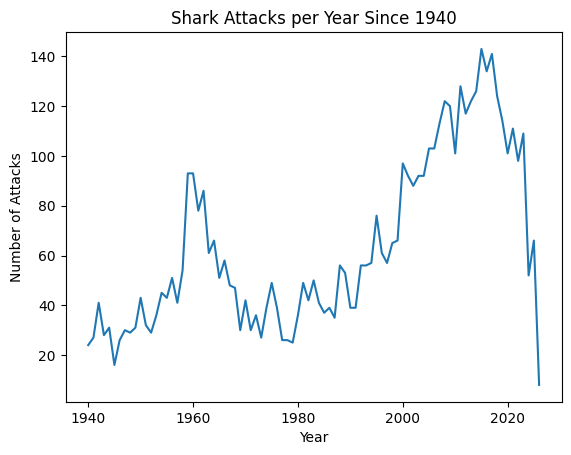

From the plot that I displayed, I see that the attacks were relatively increasing until around 1960, and then dropped again, and then started to increase again up until 2020.


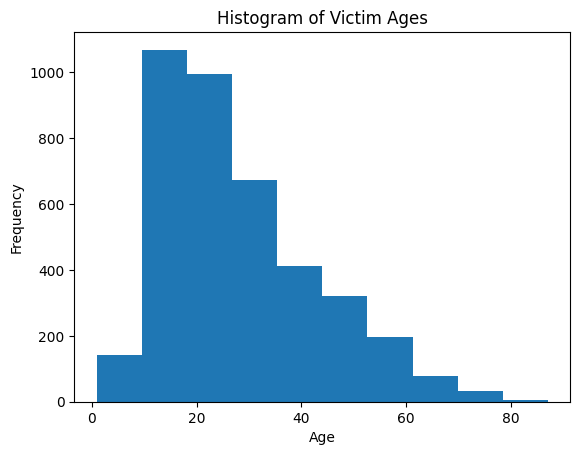

Proportion of victims who are male: 80.27%
Proportion of attacks that are unprovoked: 73.85%
From the data, sharks are more likely to launch unprovoked attacks on MEN.
From the data, It is less likely to be fatal if the attack is provoked and when it is unprovoked. However, it is more likely that compared to provoked, that the attack is fatal when the attack is unprovoked.
It is more likely that the attack is fatal when the victim is MALE
Proportion of attacks by white sharks: 10.71%


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 1 - Open shark attack file using Pandas
sharks = pd.read_excel('./data/GSAF5.xls')

# 2 - Drop columns that do not contain data
sharks = sharks.dropna(axis=1, how='all')

# 3 - Clean year variable 
sharks['Year'] = pd.to_numeric(sharks['Year'])
min_year = sharks['Year'].min()
max_year = sharks['Year'].max() 
print(f"Year range: {int(min_year)} to {int(max_year)}") # range of 0 to 2026
sharks_recent = sharks[sharks['Year'] >= 1940]
attacks_per_year = sharks_recent['Year'].value_counts().sort_index()

# used a plot to represent the change of the attacks per year since 1940
attacks_per_year.plot(title='Shark Attacks per Year Since 1940')
plt.xlabel('Year')
plt.ylabel('Number of Attacks')
plt.show()

print("From the plot that I displayed, I see that the attacks were relatively increasing until around 1960, and then dropped again, and then started to increase again up until 2020.")


# 4 - Clean Age variable and make a histogram of the ages of victims.
sharks['Age'] = pd.to_numeric(sharks['Age'], errors='coerce')
shark_plot = sharks['Age'].plot.hist(title='Histogram of Victim Ages')
plt.xlabel('Age')
plt.show()

# 5 - Find out what proportion is male
sharks['Sex'] = sharks['Sex'].str.strip()
prop_male = (sharks['Sex'] == 'M').mean()
print(f"Proportion of victims who are male: {prop_male*100:.2f}%")

# 6 - Clean Type variable so it takes 3 values: Provoked, Unprovoked, Unknown
sharks['Type'] = sharks['Type'].astype(str).str.strip()
sharks.loc[~sharks['Type'].isin(['Provoked', 'Unprovoked']), 'Type'] = 'Unknown'
prop_unprovoked = (sharks['Type'] == 'Unprovoked').mean()  
print(f"Proportion of attacks that are unprovoked: {prop_unprovoked*100:.2f}%")

# 7 - Clean Fatal Y/N variable to Y, N, Unknown
sharks['Fatal Y/N'] = sharks['Fatal Y/N'].astype(str).str.strip()
sharks.loc[~sharks['Fatal Y/N'].isin(['Y', 'N']), 'Fatal Y/N'] = 'Unknown'
#print(sharks['Fatal Y/N'].value_counts())

# 8 - Question Analysis
unprovoked_by_sex = pd.crosstab(sharks['Type'], sharks['Sex'])
print("Unprovoked attacks by sex:")
print(unprovoked_by_sex)

print("From the data, sharks are more likely to launch unprovoked attacks on MEN.")

fatal_by_type = pd.crosstab(sharks['Type'], sharks['Fatal Y/N'])
print("Fatality by attack type:")
print(fatal_by_type)


print("From the data, It is less likely to be fatal if the attack is provoked and when it is unprovoked. However, it is more likely that compared to provoked, that the attack is fatal when the attack is unprovoked.")


fatal_by_sex = pd.crosstab(sharks['Sex'], sharks['Fatal Y/N'])
print("Fatality by sex:")
print(fatal_by_sex)

print("It is more likely that the attack is fatal when the victim is MALE")

# 9. Proportion of attacks by white sharks
sharks['Species '] = sharks['Species '].astype(str).str.lower()
white_sharks = sharks['Species '].str.contains('white', na=False).mean()
print(f"Proportion of attacks by white sharks: {white_sharks*100:.2f}%")

**Q3.** Open the "tidy_data.pdf" document in the repo, which is a paper called Tidy Data by Hadley Wickham.

  1. Read the abstract. What is this paper about?
  2. Read the introduction. What is the "tidy data standard" intended to accomplish?
  3. Read the intro to section 2. What does this sentence mean: "Like families, tidy datasets are all alike but every messy dataset is messy in its own way." What does this sentence mean: "For a given dataset, it’s usually easy to figure out what are observations and what are variables, but it is surprisingly difficult to precisely define variables and observations in general."
  4. Read Section 2.2. How does Wickham define values, variables, and observations?
  5. How is "Tidy Data" defined in section 2.3?
  6. Read the intro to Section 3 and Section 3.1. What are the 5 most common problems with messy datasets? Why are the data in Table 4 messy? What is "melting" a dataset?
  7. Why, specifically, is table 11 messy but table 12 tidy and "molten"?
  8. Read Section 6. What is the "chicken-and-egg" problem with focusing on tidy data? What does Wickham hope happens in the future with further work on the subject of data wrangling?